In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import matplotlib as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Leer archivo CSV
dataset = pd.read_csv('C:/Users/user/Desktop/Practica Python/CBC data_for_meandeley_csv_01052023.csv')

dataset.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,1,28,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,2,41,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,3,40,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,4,76,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,5,20,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [3]:
# Crear una copia del dataset original
dataset_copy_RF = dataset.copy()

# Ver las columnas principales (nombres de las columnas)
print(dataset_copy_RF.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB'],
      dtype='object')


In [4]:
# Definir las columnas de características
columns_to_use = ['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']
X = dataset_copy_RF[columns_to_use]

In [6]:
# Ver las primeras filas del dataset
print(dataset_copy_RF.head())

   S. No.  Age  Sex   RBC   PCV   MCV   MCH  MCHC   RDW    TLC  PLT /mm3   HGB
0       1   28    0  5.66  34.0  60.1  17.0  28.2  20.0  11.10     128.3   9.6
1       2   41    0  4.78  44.5  93.1  28.9  31.0  13.0   7.02     419.0  13.8
2       3   40    1  4.65  41.6  89.5  28.8  32.2  13.0   8.09     325.0  13.4
3       4   76    0  4.24  36.7  86.6  26.7  30.8  14.9  13.41     264.0  11.3
4       5   20    1  4.14  36.9  89.1  27.8  31.2  13.2   4.75     196.0  11.5


In [7]:
# Ver la información general del dataset
print(dataset_copy_RF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S. No.    364 non-null    int64  
 1   Age       364 non-null    int64  
 2   Sex       364 non-null    int64  
 3   RBC       364 non-null    float64
 4   PCV       364 non-null    float64
 5   MCV       364 non-null    float64
 6   MCH       364 non-null    float64
 7   MCHC      364 non-null    float64
 8   RDW       364 non-null    float64
 9   TLC       364 non-null    float64
 10  PLT /mm3  364 non-null    float64
 11  HGB       364 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 34.3 KB
None


In [8]:
# Resumen estadístico del dataset
print(dataset_copy_RF.describe())

           S. No.         Age         Sex         RBC         PCV         MCV  \
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000   
mean   182.500000   44.917582    0.442308    4.278736   36.762912   87.509121   
std    105.221988   18.780854    0.497344    0.820166    6.830835    9.332164   
min      1.000000   11.000000    0.000000    1.360000   13.100000   55.700000   
25%     91.750000   28.000000    0.000000    3.780000   32.900000   83.175000   
50%    182.500000   44.500000    0.000000    4.335000   36.800000   87.950000   
75%    273.250000   60.000000    1.000000    4.800000   41.850000   91.875000   
max    364.000000   89.000000    1.000000    6.900000   56.900000  124.100000   

              MCH        MCHC         RDW         TLC    PLT /mm3         HGB  
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000  
mean    28.227143   32.053407   15.116511    8.863571  223.750824   11.907692  
std      3.865998    2.801790 

In [9]:
# Ver las columnas principales (nombres de las columnas)
print(dataset_copy_RF.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB'],
      dtype='object')


AttributeError: module 'matplotlib' has no attribute 'show'

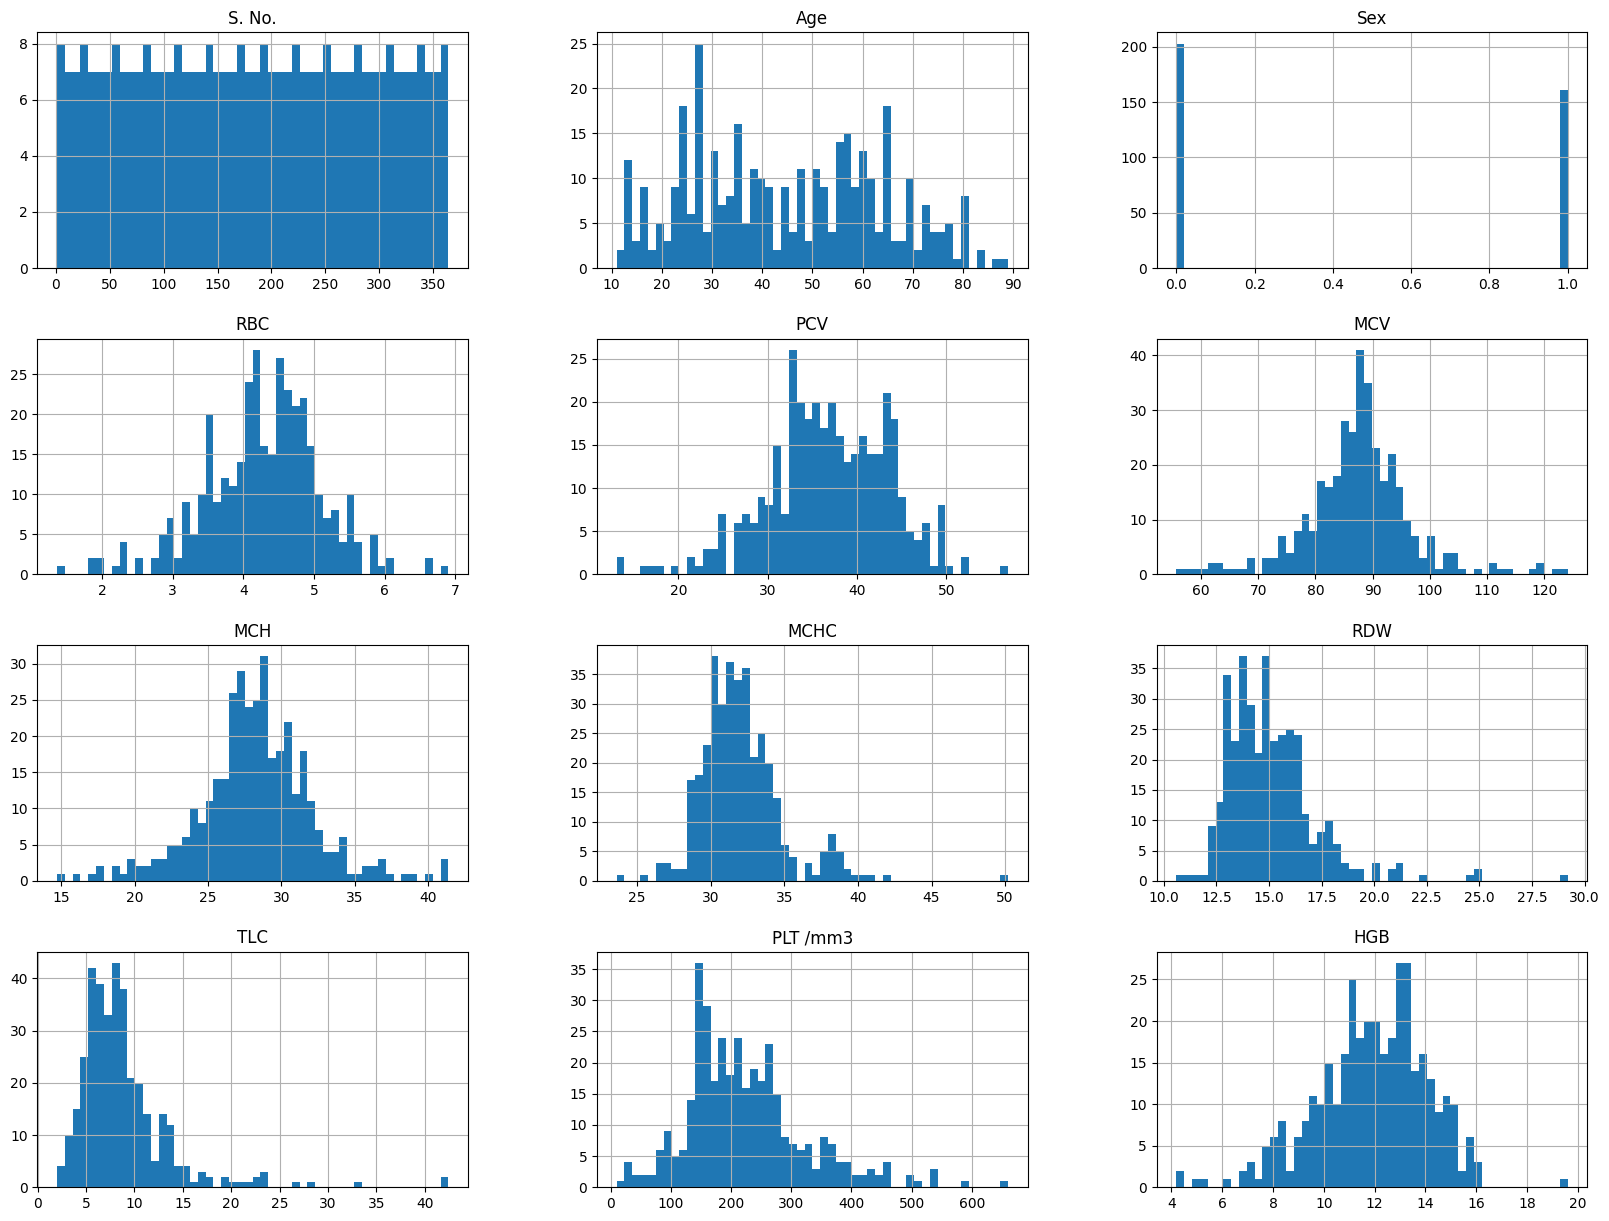

In [10]:
# Visualización de la distribución de las variables numéricas
dataset_copy_RF.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
# Verificar valores nulos
print(dataset_copy_RF.isnull().sum())

S. No.      0
Age         0
Sex         0
RBC         0
PCV         0
MCV         0
MCH         0
MCHC        0
RDW         0
TLC         0
PLT /mm3    0
HGB         0
dtype: int64


In [12]:
# Eliminar filas con valores nulos (si son pocas)
dataset_copy_RF = dataset_copy_RF.dropna()

In [13]:
# Codificar variables categóricas
encoder = ce.OrdinalEncoder()  # Puedes usar OneHotEncoder u otras técnicas según el caso
dataset_copy_RF = encoder.fit_transform(dataset_copy_RF)

In [14]:
# Separar variables predictoras (X) y variable objetivo (y)
X = dataset_copy_RF.drop('Nombre_de_la_variable_objetivo', axis=1)  # Reemplaza con la variable objetivo real
y = dataset_copy_RF['Nombre_de_la_variable_objetivo']

KeyError: "['Nombre_de_la_variable_objetivo'] not found in axis"

In [15]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'y' is not defined